In [11]:
%run GUIanaliza.py
%run velikaMestaEvrope.py
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)

C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


# Analiza krajev glede na temperaturne značilnosti
#### PROJEKTNA NALOGA PRI PROGRAMIRANJU 1
Podatki so bili zajeti iz sledečih spletnih strani:
http://www.weatherbase.com/
država, mesto,  id, povprečne temperature po posameznih mesecih;
http://www.weatherbase.com/weather/country.php3?r=EUR&regionname=Europe:
 seznam Evropskih držav z njihovimi prestolnicami (v drugem delu).

## 1.) del: Analiza izbrane države

V prvem delu analize mora uporabnik sam izbrati državo, ki jo želi analizirati. Nato vnese še izbrani mesec in temperaturo. S tem programom nato lahko poišče mesto, ki ima v izbranem mesecu temperaturo najbližjo vnešeni.
Najprej prosim zaženi spodnjo funkcijo:

In [12]:
izbrani_mesec, ime_datotekeOsn, ime_datotekeRaz = zazeni_analizaGUI()


    izbrana drzava: Cyprus 

    izbrani mesec: april 

    izbrana temperatura: 12.9°C 

    


Spodaj je prikazana osnovna tabela s podatki o temperaturah za posamezno mesto.

In [13]:
osnovni_df = pd.read_csv(ime_datotekeOsn, encoding='latin1', index_col='MESTO')
razlikaTemperatur_df = pd.read_csv(ime_datotekeRaz, encoding='latin1',index_col='MESTO')
priporoceni_df = pd.read_csv("priporoceni.txt", encoding='latin1',index_col='Mesto')

In [24]:
osnovni_df[:]

,Drzava,drsifra,januar,februar,marec,april,maj,junij,julij,avgust,september,oktober,november,december,LETNO POVPRECJE
MESTO,,,,,,,,,,,,,,,
Akrotiri Bay,Cyprus,592740,12.2,12.8,13.9,17.8,20.6,23.9,26.1,26.7,24.4,21.7,17.8,13.9,19.0
Aphrodite Hills,Cyprus,592741,12.8,12.8,13.3,16.7,19.4,22.8,25.0,25.6,23.9,21.7,17.8,14.4,18.0
Ayia Napa,Cyprus,592742,12.2,12.2,13.9,17.2,21.1,23.9,27.2,27.2,25.0,22.2,17.2,13.9,19.0
Coral Bay,Cyprus,592743,12.2,12.2,13.9,16.7,18.9,22.8,25.6,25.6,23.9,21.7,17.8,14.4,18.0
Famagusta,Cyprus,592744,12.2,12.2,13.9,17.2,20.6,23.9,26.7,26.7,24.4,21.7,17.2,13.9,19.0
Kiti,Cyprus,176090,10.6,11.7,13.9,16.7,20.6,23.9,26.7,26.7,25.0,21.7,16.7,12.8,18.0
Kyrenia,Cyprus,592745,10.0,10.0,12.8,16.1,21.1,26.1,28.9,27.8,25.0,20.0,16.1,12.2,18.0
Larnaca,Cyprus,90671,11.7,11.7,13.3,16.7,20.6,23.9,26.7,26.7,25.0,21.7,17.2,13.3,19.0
Lefkosa,Cyprus,176071,8.9,10.0,11.7,15.6,20.6,25.0,27.8,27.8,25.0,20.6,15.6,10.6,18.0


V spodnji tabeli so podatki o temperaturah za izbrani mesec. V stolpcu z imenom "razlika od vnosa" pa se nahajajo vrednosti, ki povedo, za koliko se vnešena temperatura v tem mesecu razlikuje od dejanske. Mesta so urejena naraščajoče po zadnjih vrednostih.

In [14]:
mesec_df = razlikaTemperatur_df[[izbrani_mesec, 'razlika od vnosa','izbrana temperatura']]
razvrsceni_df = mesec_df.sort_values('razlika od vnosa', ascending=True)
razvrsceni_df[:][[izbrani_mesec, 'razlika od vnosa']]

,april,razlika od vnosa
MESTO,,
Lefkosa,15.6,2.7
Kyrenia,16.1,3.2
Aphrodite Hills,16.7,3.8
Coral Bay,16.7,3.8
Kiti,16.7,3.8
Larnaca,16.7,3.8
Morphou,16.7,3.8
Nicosia,16.7,3.8
Paphos,16.7,3.8


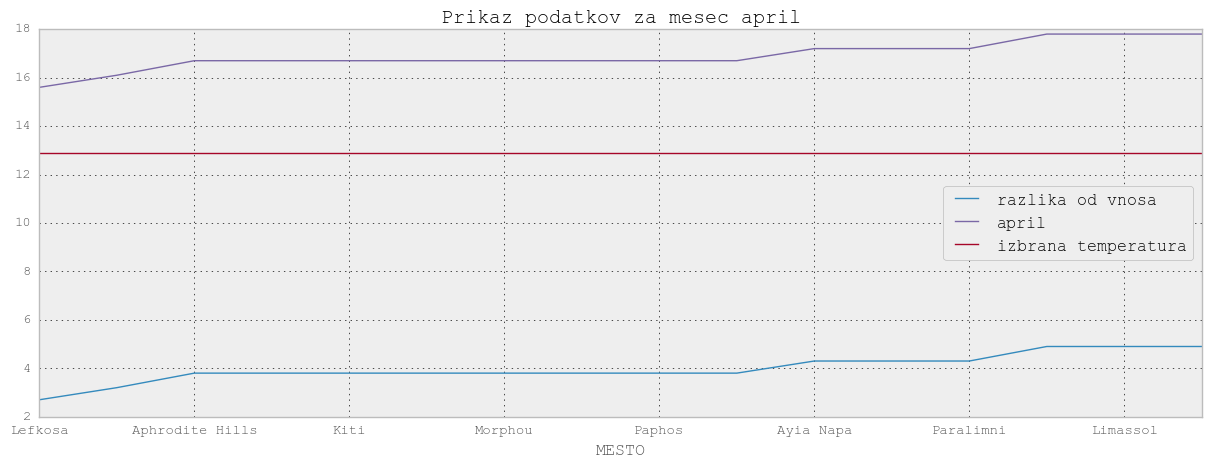

In [15]:
t1 = razvrsceni_df['razlika od vnosa']
t1.colums = ['razlika od vnosa']
t2 = razvrsceni_df[izbrani_mesec]
t2.colums = [izbrani_mesec]
t3 = razvrsceni_df['izbrana temperatura']
t3.colums = ['izbrana temperatura']
zdruzi = pd.concat([t1, t2, t3], axis =1)
zdruzi.plot(title='Prikaz podatkov za mesec ' + izbrani_mesec)

Spodaj je zapisana tabela s podatki, za tri mesta, ki se v izbrani drzavi najbolj priblizajo vašim želenim podatkom.

In [16]:
najblizji3_cela = razlikaTemperatur_df.sort_values('razlika od vnosa', ascending=True)[:3]
najblizji3_cela[:]

,Drzava,drsifra,januar,februar,marec,april,maj,junij,julij,avgust,september,oktober,november,december,LETNO POVPRECJE,razlika od vnosa,izbrana temperatura
MESTO,,,,,,,,,,,,,,,,,
Lefkosa,Cyprus,176071,8.9,10.0,11.7,15.6,20.6,25.0,27.8,27.8,25.0,20.6,15.6,10.6,18.0,2.7,12.9
Kyrenia,Cyprus,592745,10.0,10.0,12.8,16.1,21.1,26.1,28.9,27.8,25.0,20.0,16.1,12.2,18.0,3.2,12.9
Aphrodite Hills,Cyprus,592741,12.8,12.8,13.3,16.7,19.4,22.8,25.0,25.6,23.9,21.7,17.8,14.4,18.0,3.8,12.9


Ker se verjetno v večini mest vaša izbrana temperatura kar precej razlikuje od dejanske, vam želim priporočiti boljši vnos podatkov. Če želiš najti mesta v katerih se temperatura od vaše trenutno izbrane razlikuja za manj kot 1°C, vam svetujem, da vnesete enaga izmed mesecoev v spodnji tabeli.

In [17]:
priporoceni_df[:]

,mesec
Mesto,
Larnaca,januar
Larnaca,januaravgust
Akrotiri Bay,julij
Akrotiri Bay,julijavgust
Kyrenia,januar
Paphos,februar
Paphos,februarjulij
Paphos,februarjulijjanuar
Morphou,januar


Spodnji graf prikazuje kolikšen delež mest s podobno temperaturo boste našli v posameznem mesecu. Če meseca ni na grafu, potem se v tem mesecu temperatura v nobenem mestu dovolj ne približa izbrani temperaturi.

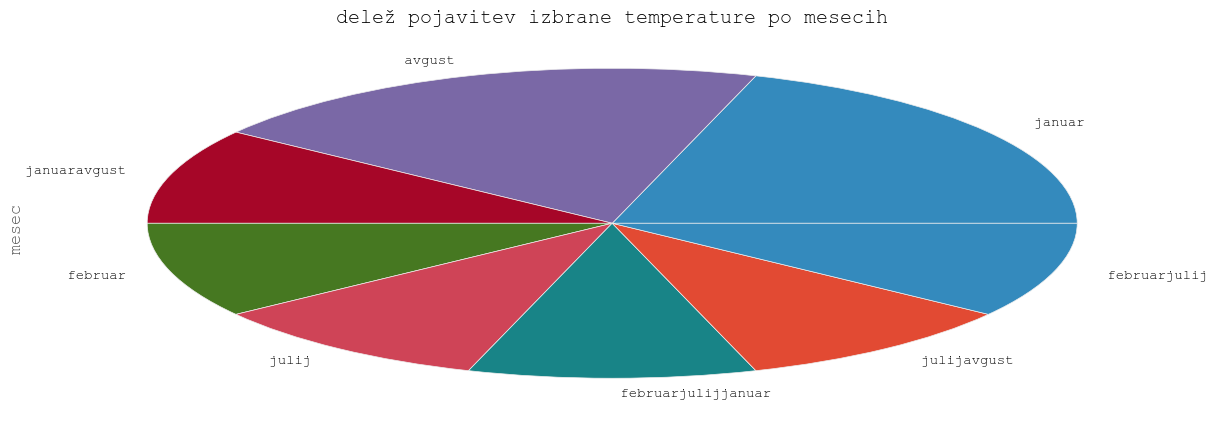

In [18]:
st = priporoceni_df['mesec '].value_counts().plot(kind='pie',title='delež pojavitev izbrane temperature po mesecih')

## 2.) del: Analiza velikih Evropskih mest

In [34]:
mesta_df = pd.read_csv('podatkiVelikaMesta.txt', encoding='latin1', index_col='MESTO')

Spodaj je prikazanih prvih nekaj mest iz osnovne tabele.

In [35]:
mesta_df[:4]

,Drzava,sifra,januar,februar,marec,april,maj,junij,julij,avgust,september,oktober,november,december,LETNO POVPRECJE
MESTO,,,,,,,,,,,,,,,
Vilnius,Lithuania,267300,-5.0,-4.4,-1.1,5.0,11.7,15.6,16.7,15.6,11.7,5.6,0.6,-3.3,5.0
Warsaw,Poland,57321,-1.7,-1.7,2.8,7.8,13.3,16.1,17.8,17.8,13.3,8.3,2.8,0.0,8.0
Helsinki,Finland,47920,-5.6,-6.1,-2.2,3.3,10.0,13.9,16.7,15.0,10.0,5.0,0.0,-3.9,4.0
Nicosia,Cyprus,60671,10.0,10.0,12.2,16.7,21.7,25.6,28.3,28.3,25.6,20.6,16.1,11.7,18.0


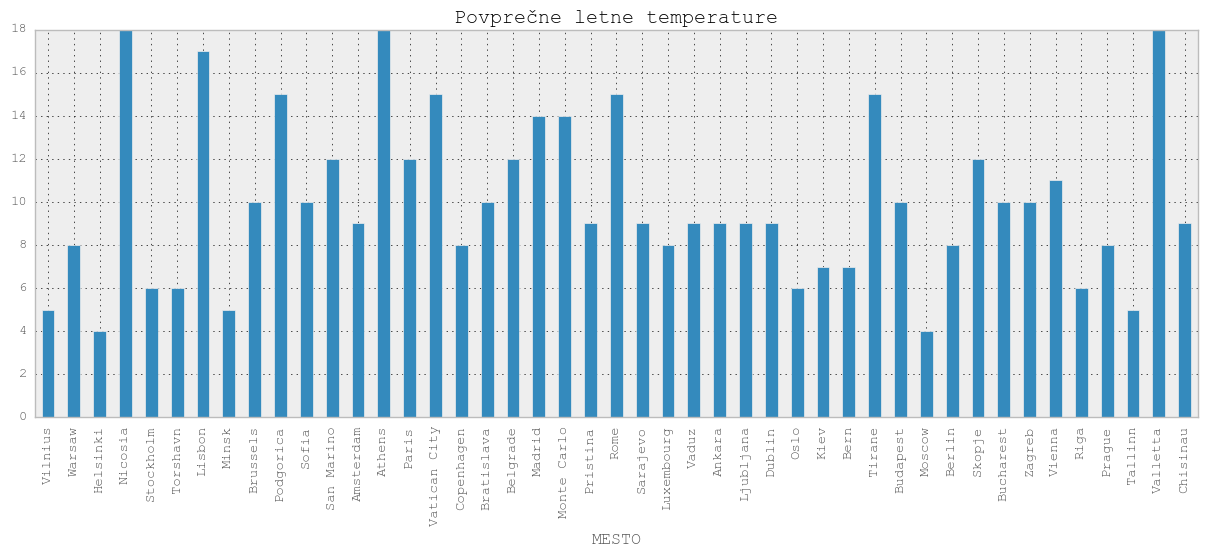

In [36]:
mesta_df['LETNO POVPRECJE'].plot(kind='bar',title='Povprečne letne temperature')

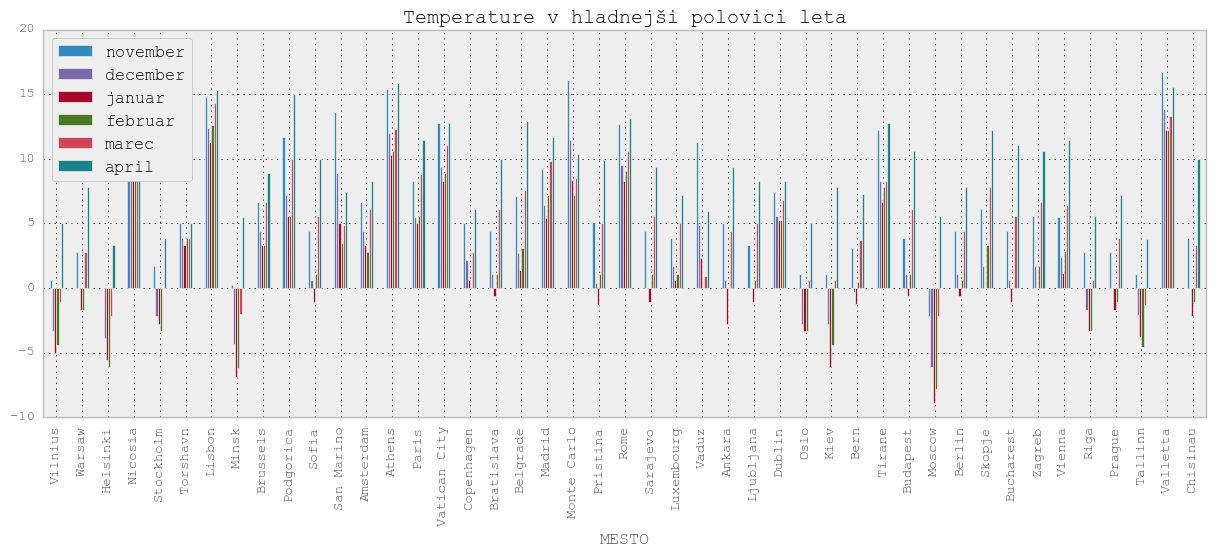

In [37]:
g1 = mesta_df['januar'] 
g2 = mesta_df['februar']
g3 = mesta_df['marec']
g4 = mesta_df['april']
g11 = mesta_df['november']
g12 = mesta_df['december']
zdruzi1 = pd.concat([g11,g12,g1,g2,g3,g4],axis =1).plot(kind='bar',title='Temperature v hladnejši polovici leta')

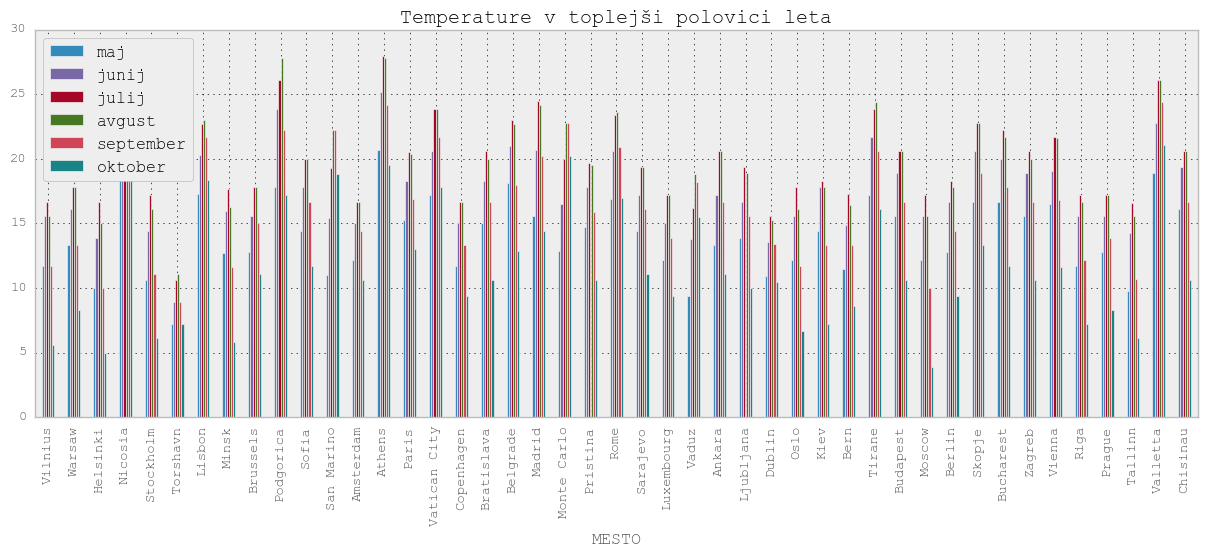

In [38]:
g5 = mesta_df['maj']
g6 = mesta_df['junij']
g7 = mesta_df['julij']
g8 = mesta_df['avgust']
g9 = mesta_df['september']
g10 = mesta_df['oktober']
zdruzi2 = pd.concat([g5,g6,g7,g8,g9,g10],axis =1).plot(kind='bar',title='Temperature v toplejši polovici leta')

V spodnji tabeli in grafu so zabeleženi vsi dogodki, ko mesečne temperature padejo pod 0°C. Ker je iz zgornjih dveh tabel razvidno, da temperatura pade pod ledišče le v petih različnih mesecih, obravnavamo le te.

In [39]:
pod_niclo11 = g11<0
pod_niclo12 = g12<0
pod_niclo1 = g1<0
pod_niclo2 = g2<0
pod_niclo3 = g3<0

In [40]:
nov = mesta_df['november'][pod_niclo11]
dec = mesta_df['december'][pod_niclo12]
jan = mesta_df['januar'][pod_niclo1]
feb = mesta_df['februar'][pod_niclo2]
mar = mesta_df['marec'][pod_niclo3]
najbolj_mrzli = pd.concat([nov,dec,jan, feb,mar],axis =1)
pd.concat([nov,dec,jan, feb,mar],axis =1)

,november,december,januar,februar,marec
Ankara,NaN,NaN,-2.8,NaN,NaN
Berlin,NaN,NaN,-0.6,NaN,NaN
Bern,NaN,-0.3,-1.2,NaN,NaN
Bratislava,NaN,NaN,-0.6,NaN,NaN
Bucharest,NaN,NaN,-1.1,NaN,NaN
Budapest,NaN,NaN,-0.6,NaN,NaN
Chisinau,NaN,NaN,-2.2,-1.1,NaN
Helsinki,NaN,-3.9,-5.6,-6.1,-2.2
Kiev,NaN,-2.8,-6.1,-4.4,NaN
Ljubljana,NaN,NaN,-1.1,NaN,NaN


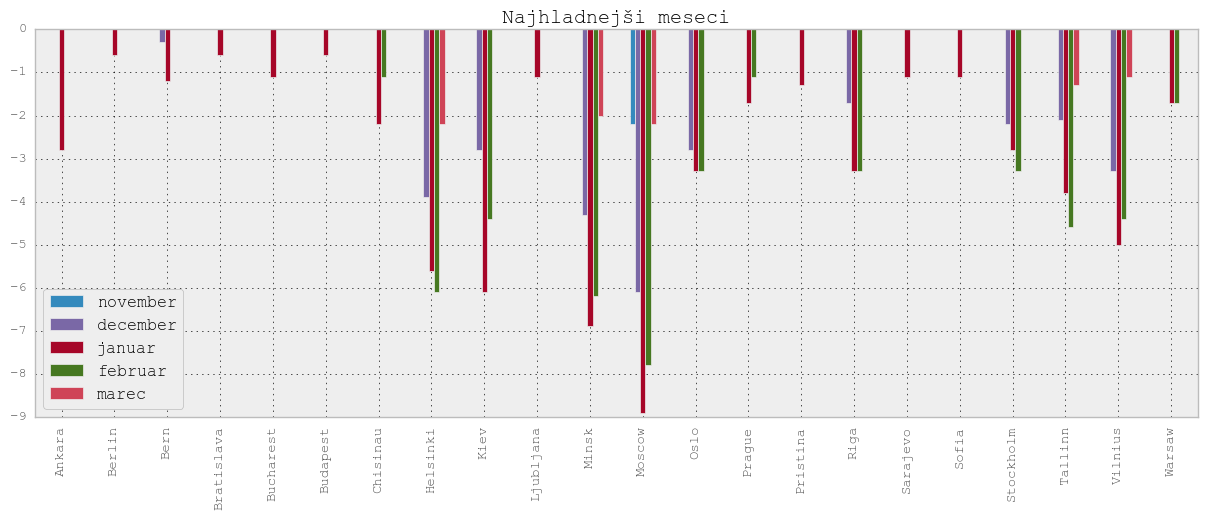

In [41]:
najbolj_mrzli.plot(kind='bar',title='Najhladnejši meseci')

Iz grafa vidimo, da je najhladnejši mesec v letu februar, mesto z najnižjimi temperaturami, pa je Moskva.